<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%5B%ED%95%99%EC%83%9D%EC%9A%A9%5D%EC%8B%A4%EC%8A%B51%EC%9D%BC%EC%B0%A8_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항식 문제를 선형회기로 풀어봅니다 
![](https://drive.google.com/uc?export=view&id=1X3BKISKrrSOqqAATlwk-n9qzXmXI4-lt)


* 2차 다항식에서 만들어진 데이터 이므로 2차 다항식 문제로 풀어본다
* 4차 다항식 형태로 풀어 본다면?
* Loss 는 MSE와 RMSE를 활용한다. 각 Loss로 했을 때의 문제는?
* Learning Rate를 바꾸어 가면서 실험 해 보세요. 크게 하면?


In [ ]:
# Pytorch로 개발하기 위한 Library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

In [ ]:
def show_predicted(x, y, preds, ax=None):
    if ax is None: 
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()


### Stochastic Gradient Descent의 개념을 이해한다 
* Loss계산 후 Step Loss를 줄이기 위해 학습이 진행됩니다. 
* Gradient(기울기)는 Loss의 기울기 입니다

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png" height="200px" width="300px">

<img src="https://miro.medium.com/max/1400/1*zoywHDM6_AdN2LmQbro9Iw.webp" height="150px" width="350px">


* Learning의 크기는 학습속도에 영향을 미칩니다. 너무 크면 학습이 안될 수도 있습니다 

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png" height="200px" width="500px">




 

Initial Weights: tensor([-1.8321,  1.6028, -0.8873], requires_grad=True)
Initial Cost: 346.9790344238281
Epoch    1/10000 a: -1.799, b: 1.605, c: -0.887, Cost: 344.169708
Epoch 1001/10000 a: 0.220, b: 1.768, c: -0.838, Cost: 25.757513
Epoch 2001/10000 a: 0.217, b: 1.804, c: -0.795, Cost: 25.725420
Epoch 3001/10000 a: 0.215, b: 1.839, c: -0.751, Cost: 25.694437
Epoch 4001/10000 a: 0.213, b: 1.872, c: -0.708, Cost: 25.664499
Epoch 5001/10000 a: 0.211, b: 1.904, c: -0.665, Cost: 25.635553
Epoch 6001/10000 a: 0.208, b: 1.935, c: -0.622, Cost: 25.607542
Epoch 7001/10000 a: 0.206, b: 1.965, c: -0.579, Cost: 25.580408
Epoch 8001/10000 a: 0.204, b: 1.994, c: -0.537, Cost: 25.554111
Epoch 9001/10000 a: 0.202, b: 2.021, c: -0.495, Cost: 25.528597


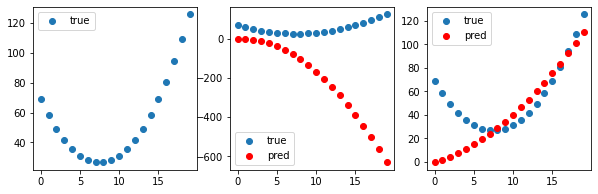

In [ ]:
# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1


# 모델 가정
# Quadratic function
def hypothesis(x, coefficients):
    a,b,c = coefficients

    ##### [실습]
    ##### 학습할 모델(=수식) 을 정의한다 
    hypo = ?????
    ##### 

    return hypo 



##### RMSE Loss를 구현해 본다. 
def rmse(preds, targets):

    error = preds-targets

    ##### [실습]
    ###### RMSE를 정의한다 ###
    rmse = ?????
    ######


    return rmse


fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])

# 2차 함수이므로 bias 까지 포함하여 random 값 3개를 학습이 되도록 선언한다
params = torch.randn(3).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# RMSE loss
cost = rmse(preds,  y_train)
print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

### Learning Rate를 0.0001, 0.1, 0.00000001 에 대해 실험해 본다. 
optimizer = torch.optim.SGD([params], lr=0.0001) 

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다. 
    preds = hypothesis(x_train, params)
    #####
    
    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step() 
    #####


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

Initial Weights: tensor([ 0.9091, -0.1633,  1.9999], requires_grad=True)
Initial Cost: 10038.4453125
Epoch    1/10000 a: 0.846, b: -0.167, c: 2.000, Cost: 9007.792969
Epoch 1001/10000 a: 0.331, b: -0.160, c: 2.024, Cost: 650.108032
Epoch 2001/10000 a: 0.329, b: -0.121, c: 2.050, Cost: 647.901733
Epoch 3001/10000 a: 0.326, b: -0.083, c: 2.075, Cost: 645.755432
Epoch 4001/10000 a: 0.323, b: -0.045, c: 2.101, Cost: 643.665894
Epoch 5001/10000 a: 0.321, b: -0.008, c: 2.127, Cost: 641.634766
Epoch 6001/10000 a: 0.319, b: 0.028, c: 2.152, Cost: 639.656372
Epoch 7001/10000 a: 0.316, b: 0.064, c: 2.177, Cost: 637.731934
Epoch 8001/10000 a: 0.314, b: 0.099, c: 2.203, Cost: 635.858154
Epoch 9001/10000 a: 0.311, b: 0.134, c: 2.228, Cost: 634.033569


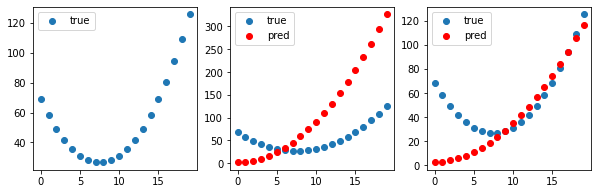

In [ ]:
#MSE로 위의 문제를 풀어 본다 

# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1


# 모델 가정
# Quadratic function
def hypothesis(x, coefficients):
    a,b,c = coefficients
    hypo = a*(x**2)+(b*x)+c

    return hypo 


##### MSE Loss를 구현해 본다. 
def mse(preds, targets):

    error = preds-targets

    ##### [실습]
    ###### RMSE를 정의한다 ###
    mse = (error**2).mean()
    ######


    return mse

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])

# 2차 함수이므로 bias 까지 포함하여 random 값 3개를 학습이 되도록 선언한다
params = torch.randn(3).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# mse loss
cost = mse(preds,  y_train)
print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

##### [실습]
##### 적절한 Learning Rate를 할당한다. 
optimizer = torch.optim.SGD([params], lr=??????????) 
######

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다. 
    preds = hypothesis(x_train, params)
    #####
    
    # cost 계산
    cost = mse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() 
    

    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

Initial Weights: tensor([ 0.4806, -1.1301,  0.4818, -0.6329, -0.4162], requires_grad=True)
Initial Cost: 19706.943359375
Epoch    1/10000 a: 0.481, b: -1.129, c: 0.482, Cost: 205709.703125
Epoch 1001/10000 a: 0.684, b: -0.859, c: 0.518, Cost: 195366.000000
Epoch 2001/10000 a: 0.757, b: -0.688, c: 0.542, Cost: 191439.937500
Epoch 3001/10000 a: 0.795, b: -0.559, c: 0.559, Cost: 189281.703125
Epoch 4001/10000 a: 0.817, b: -0.458, c: 0.573, Cost: 187957.187500
Epoch 5001/10000 a: 0.830, b: -0.376, c: 0.584, Cost: 187098.796875
Epoch 6001/10000 a: 0.838, b: -0.310, c: 0.594, Cost: 186524.531250
Epoch 7001/10000 a: 0.844, b: -0.255, c: 0.601, Cost: 186130.187500
Epoch 8001/10000 a: 0.847, b: -0.210, c: 0.607, Cost: 185854.671875
Epoch 9001/10000 a: 0.849, b: -0.173, c: 0.613, Cost: 185658.468750


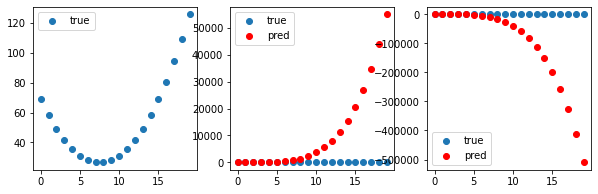

In [ ]:
# 위와 똑같은 문제를 4차 다항식으로 정의 하시요. 결과가 어떤가요?

# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1


# 모델 가정
def hypothesis(x, coefficients):
    a,b,c,d,e = coefficients

    ##### [실습]
    ##### 학습할 모델(=수식) 을 정의한다 
    hypo = a*(x**4)+b*(x**3)+c*(x**2)+d*(x) + e
    ##### 

    return hypo 


##### RMSE Loss를 구현해 본다. 
def rmse(preds, targets):

    error = preds-targets
    ###### RMSE를 정의한다 ###
    rmse = ?????
    ######

    return rmse

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])


##### [실습] 4차 함수
params = torch.randn(5).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# RMSE loss
cost = rmse(preds,  y_train)
print(f"Initial Cost: {cost}")


##### [실습] Learning Rate을 바꾸어 가면서 실험해 보세요
optimizer = torch.optim.SGD([params], lr=?????) # 0.0001?

##### [실습] Epoch를 바꾼다면?
nb_epochs = ????? # 10000? 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다. 
    preds = ?????
    #####
    
    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    ?????
    #####


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

Initial Weights: tensor([0.7690, 0.5841], requires_grad=True)
Initial Cost: 3.048475503921509
Epoch    1/1000 a: 0.812, b: 0.603, Cost: 2.993020
Epoch  101/1000 a: 2.006, b: 1.016, Cost: 0.027716
Epoch  201/1000 a: 2.011, b: 1.005, Cost: 0.027733
Epoch  301/1000 a: 2.011, b: 1.005, Cost: 0.027730
Epoch  401/1000 a: 2.011, b: 1.005, Cost: 0.027731
Epoch  501/1000 a: 2.011, b: 1.005, Cost: 0.027731
Epoch  601/1000 a: 2.011, b: 1.005, Cost: 0.027731
Epoch  701/1000 a: 2.011, b: 1.005, Cost: 0.027731
Epoch  801/1000 a: 2.011, b: 1.005, Cost: 0.027731
Epoch  901/1000 a: 2.011, b: 1.005, Cost: 0.027731


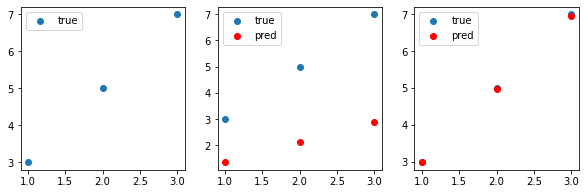

In [ ]:
# y = 2x +1 데이터를 확인한다 
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[3], [5], [7]])

# Linear function
def hypothesis(x, coefficients):
    a,b = coefficients
    return a*x + b
                 

##### RMSE Loss를 구현해 본다. 
def rmse(preds, targets):
    return ?????
#####

###### 실습 : Learing Rate 를 바꾸어 가면서 위 데이터에 대한 문제를 풀어 본다. 
def show_predicted(x, y, preds, ax=None):
    if ax is None: 
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()


fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])

params = torch.randn(2).requires_grad_()
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# RMSE loss
cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

### Learning Rate를 0.0001, 0.1, 0.00000001 에 대해 실험해 본다. 
optimizer = torch.optim.SGD([params], lr=?????) 

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다. 
    preds = hypothesis(x_train, params)
    #####
    
    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step() 
    #####


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

## 데이터의 형태를 알아도 잘 학습이 안되는 경우

Initial Weights: tensor([-0.3453,  0.9821, -0.3403,  0.1119], requires_grad=True)
Initial Cost: 92553.875
Epoch    1/10000 a: -3.554, b: 0.851, c: -0.343, d: 0.112, Cost: 126714752.000000
Epoch 1001/10000 a: -6.894, b: -1.304, c: -0.405, d: 0.110, Cost: 125511136.000000
Epoch 2001/10000 a: -8.207, b: -2.677, c: -0.445, d: 0.110, Cost: 125035600.000000
Epoch 3001/10000 a: -9.046, b: -3.776, c: -0.476, d: 0.109, Cost: 124730800.000000
Epoch 4001/10000 a: -9.662, b: -4.710, c: -0.502, d: 0.109, Cost: 124506680.000000
Epoch 5001/10000 a: -10.142, b: -5.527, c: -0.526, d: 0.108, Cost: 124331456.000000
Epoch 6001/10000 a: -10.525, b: -6.255, c: -0.546, d: 0.108, Cost: 124191224.000000
Epoch 7001/10000 a: -10.842, b: -6.911, c: -0.564, d: 0.107, Cost: 124075048.000000
Epoch 8001/10000 a: -11.098, b: -7.509, c: -0.581, d: 0.107, Cost: 123981176.000000
Epoch 9001/10000 a: -11.320, b: -8.055, c: -0.596, d: 0.107, Cost: 123899384.000000


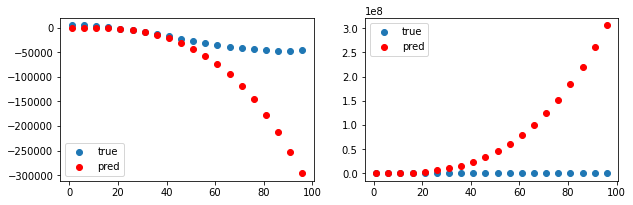

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float() # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

def hypothesis(x, coefficients):
    a,b,c,d = coefficients

    
    return a*(x**3)+b*(x**2)+c*x+d

############################################################
##### 실습 : 3차식 문제를 풀 수 있는 코드를 작성해 보세요
params = ?????
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD([params], lr=0.001)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = hypothesis(x_train, params)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, d: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), params[3].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

## nn.Linear()를 이용하여 위 문제를 해결해 봅시다
* Loss 함수도 :Pytorch 내부에 있는 것을 활용한다. 

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


Initial Weights: [Parameter containing:
tensor([[-0.8604]], requires_grad=True), Parameter containing:
tensor([-0.9921], requires_grad=True)]
Initial Cost: 29967.884765625
Epoch    1/1000,  Cost: 29659.587891
Epoch  101/1000,  Cost: 5704.567383
Epoch  201/1000,  Cost: 5328.377930
Epoch  301/1000,  Cost: 5326.647461
Epoch  401/1000,  Cost: 5324.918945
Epoch  501/1000,  Cost: 5323.190918
Epoch  601/1000,  Cost: 5321.463867
Epoch  701/1000,  Cost: 5319.737793
Epoch  801/1000,  Cost: 5318.010742
Epoch  901/1000,  Cost: 5316.285156
Train accuracy(RMSE) :  5314.56005859375


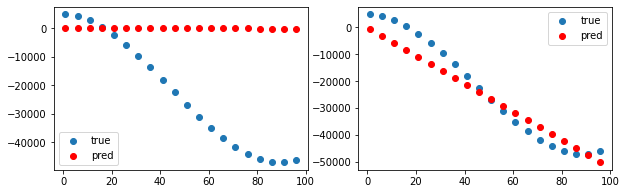

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

#######
######## 실습 : 1개의 입력을 받고 1개의 출력을 내는 Linear 모델은 어떻게 선언할까요?
model = ?????
########


print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.1)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Multi Layer Perceptron (MLP)로 해당 문제를 해결합니다. 

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential

Initial Weights: [Parameter containing:
tensor([[-0.0731],
        [ 0.8802],
        [-0.1848],
        [-0.0872],
        [-0.0075]], requires_grad=True), Parameter containing:
tensor([ 0.5783,  0.8458, -0.1372, -0.5813, -0.4112], requires_grad=True), Parameter containing:
tensor([[-0.4065, -0.0582, -0.0565, -0.4397, -0.3083],
        [-0.1833,  0.0565,  0.1934, -0.3284, -0.3722],
        [ 0.3605,  0.3704,  0.4138,  0.0834, -0.0441],
        [-0.0974, -0.1675, -0.2834, -0.0174,  0.0637],
        [-0.2325, -0.1129, -0.1293, -0.0191,  0.1444]], requires_grad=True), Parameter containing:
tensor([ 0.4365,  0.2650, -0.0532, -0.2079,  0.1820], requires_grad=True), Parameter containing:
tensor([[ 0.3576,  0.1518,  0.4121,  0.1127, -0.4096]], requires_grad=True), Parameter containing:
tensor([-0.1506], requires_grad=True)]
Initial Cost: 30023.435546875
Epoch    1/1000,  Cost: 30023.236328
Epoch  101/1000,  Cost: 30005.066406
Epoch  201/1000,  Cost: 29950.517578
Epoch  301/1000,  Cost: 28995

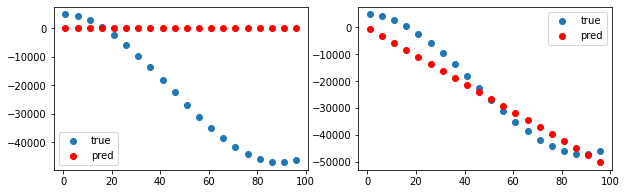

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


###############
###### 실습 : inputsize=1, hidden_size=5, outputsize=1 짜리 MLP를 만들어 보세요
model = ?????
###############


print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Neural Network 는 nn.Module을 이용하여 객체로 표현합니다. 

* 위에 실습한 내용을 nn.Module을 이용하여 수정해 봅시다

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png" height="300px" width="700px">



Initial Cost: 30004.380859375
Epoch    1/1000,  Cost: 30004.203125
Epoch  101/1000,  Cost: 29958.267578
Epoch  201/1000,  Cost: 29263.326172
Epoch  301/1000,  Cost: 5323.379395
Epoch  401/1000,  Cost: 5315.792480
Epoch  501/1000,  Cost: 5308.170410
Epoch  601/1000,  Cost: 5300.488281
Epoch  701/1000,  Cost: 5292.722168
Epoch  801/1000,  Cost: 5284.846191
Epoch  901/1000,  Cost: 5276.834473
Train accuracy(RMSE) :  5268.65478515625


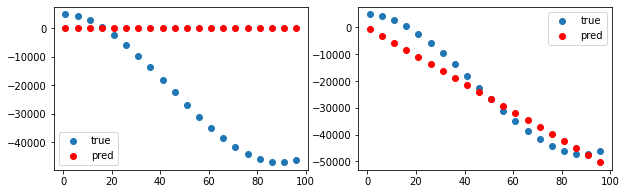

In [ ]:
#### 실습 : nn.Module 을 이용하여 위의 MLP를 구현한다. 

import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()

    ####### 실습 : 여기에 모델을 선언한다. 
    self.linear = ?????
  def forward(self, x):
      return self.linear(x)




x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


###############
###### 실습 : LinearRegressionModel 을 이용해 보세요
model = ?????

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Activation 함수를 이용하여 결과에 비 선형성을 추가합니다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbQFeQ8%2Fbtrq5pVsbmm%2FNglSr508rNOo0ctBziaN5k%2Fimg.png" height="300px" width="500px">


아래 블로그가 정리가 너무 잘 되어 있음

https://sanghyu.tistory.com/182

Initial Cost: 30589.27734375
Epoch    1/10000,  Cost: 30589.103516
Epoch 1001/10000,  Cost: 5351.833008
Epoch 2001/10000,  Cost: 5318.494629
Epoch 3001/10000,  Cost: 5280.512695
Epoch 4001/10000,  Cost: 5233.613281
Epoch 5001/10000,  Cost: 5169.701660
Epoch 6001/10000,  Cost: 5071.320312
Epoch 7001/10000,  Cost: 4898.078613
Epoch 8001/10000,  Cost: 4564.565430
Epoch 9001/10000,  Cost: 4667.249512


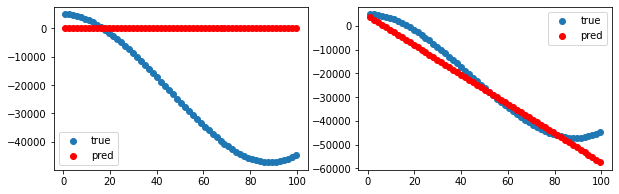

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.7).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.00005)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % 1000 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

Initial Cost: 30556.826171875
Epoch    1/10000,  Cost: 30556.781250
Epoch 1001/10000,  Cost: 5311.939453
Epoch 2001/10000,  Cost: 5227.095703
Epoch 3001/10000,  Cost: 5074.596191
Epoch 4001/10000,  Cost: 4654.828613
Epoch 5001/10000,  Cost: 4872.522949
Epoch 6001/10000,  Cost: 4781.472656
Epoch 7001/10000,  Cost: 4661.176270
Epoch 8001/10000,  Cost: 4558.097656
Epoch 9001/10000,  Cost: 4455.202637


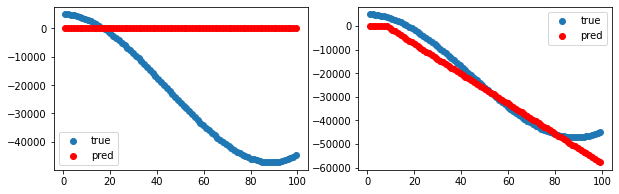

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    
    #################
    #### 실습 : 각 linear layer 사이 사이에 Sigmoid, Tanh, ReLU의 activation들을 넣어 보세요. 
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                                #### 실습 : ReLU? Sigmoid? Tanh?
                                ?????
                                
                                nn.Linear(in_features=5, out_features=5, bias=True),
                                #### 실습 : ReLU? Sigmoid? Tanh?, leakyReLU?
                               ?????
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)


model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

## [참고] 실험할때 마다 항상 똑같은 값을 만들고 싶으면?
* 뉴럴네트워크는 새로 수행될 때마다 Random 값이 생성된다. 
* Random Seed 를 고정시키면 항상 똑같은 값이 나오게 된다. 

In [ ]:
seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정

# 데이터를 대해 Train, Validation, Test용으로 나누는 실습을 한다 
* 학습부/평가부를 나누어야 한다 
* Multivariate 한 입력을 처리하는 실습을 한다

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99785E3F5E48AEC50A" height="300px" width="500px">


참고

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://blog.naver.com/PostView.naver?blogId=siniphia&logNo=221396370872

In [ ]:
from sklearn.model_selection import train_test_split

def get_train_testset(X,y, tensor=False, show=True):

  ############## 실습 : train_test_split을 이용하여 데이터를 나눈다.
  X_train, X_test, y_train, y_test = ?????
  ####################################

  if show:
    fig, ax = plt.subplots(1,2, figsize=(5,2))
    ax[0].scatter(X_train, y_train, s=100)
    ax[1].scatter(X_test, y_test, s=100)

  if tensor:
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()
    #X_train = x_train.view(X_train.size(0), -1)
    #y_train = y_train.view(y_train.size(0), -1)

    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test).float()
    #X_test = X_test.view(X_test.size(0), -1)
    #y_test = y_test.view(y_test.size(0), -1)

  return X_train, X_test, y_train, y_test

Initial Cost: 29422.017578125
Epoch    1/100000, Cost_train: 29421.978516, Cost_val: 27712.205078
Epoch 10001/100000, Cost_train: 3517.961426, Cost_val: 3125.737549
Epoch 20001/100000, Cost_train: 2871.091309, Cost_val: 3455.504395
Epoch 30001/100000, Cost_train: 2515.645752, Cost_val: 2853.932861
Epoch 40001/100000, Cost_train: 2377.968750, Cost_val: 2628.193359
Epoch 50001/100000, Cost_train: 2498.940186, Cost_val: 2287.868164
Epoch 60001/100000, Cost_train: 2343.754395, Cost_val: 1553.648804
Epoch 70001/100000, Cost_train: 3189.262207, Cost_val: 1109.713989
Epoch 80001/100000, Cost_train: 997.793579, Cost_val: 2454.334229
Epoch 90001/100000, Cost_train: 1255.775513, Cost_val: 2838.122314
Train accuracy(RMSE) :  998.219482421875
Test accuracy(RMSE) : 1310.677490234375


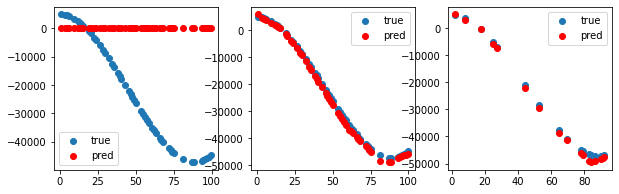

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

##### 실습 : Seed 를 바꾸어 가면서 실습해 보세요
seed = ?????
################################
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정

x = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000

##################################################
###### 실습: 데이터를 Train, Validation, Test로 나눕니다. 
x_train, x_test, y_train, y_test = ?????
x_train, x_val, y_train, y_val = ?????
##########################################

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=10, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=10, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)

# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
 
# print(f"Initial Weights: {list(model.parameters())}")


############ 실습 : 학습 데이터를 활용하여 학습
preds = model(x_train)
##############################################


fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

################# 실습 : epoch를 원하는 만큼 변경해 보세요
nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
###########################################################

for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    ############ 실습 : Validation 데이터를 활용하여 평가
    preds_val = model(x_val)
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))
    #######################################################


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')


############ 실습 : 학습데이터에 대한 정확도 계산
preds = model(x_train)
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")
##########################################################
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

############ 실습 : 평가데이터에 대한 정확도 계산
preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
############################################################
show_predicted(x_test, y_test, preds_test.detach().numpy(),ax[2])

# [참고] Sklearn examples

Error yf_linear: 4367.800954
Error yf_squared: 3085.459794
Error yf_cubic: 0.000000


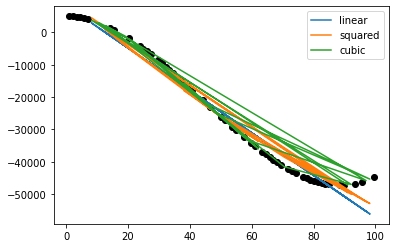

In [ ]:
from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)

x = np.arange(1,100,1.2) # start, stop, step
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000

x_train, x_test, y_train, y_test = get_train_testset(x,y, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train, show=False)

plt.scatter(x_train, y_train, color="black")

model_linear= LinearRegression() #random_state=20)
model_squared= LinearRegression() #random_state=20)
model_cubic= LinearRegression() #random_state=20)

x2=x_train**2
x3=x_train**3

model_linear.fit(np.vstack([x_train]).T, y_train)
model_squared.fit(np.vstack([x_train,x2]).T, y_train)
model_cubic.fit(np.vstack([x_train,x2,x3]).T, y_train)


yf_linear=model_linear.predict(np.vstack([x_test]).T)
yf_squared=model_squared.predict(np.vstack([x_test,x_test**2]).T)
yf_cubic=model_cubic.predict(np.vstack([x_test,x_test**2,x_test**3]).T)

plt.plot(x_test,yf_linear, label="linear")
plt.plot(x_test,yf_squared, label="squared")
plt.plot(x_test,yf_cubic, label="cubic")
plt.legend()

from sklearn.metrics import mean_squared_error
print (f"Error yf_linear: {mean_squared_error(y_test, yf_linear, squared=False):.6f}")
print (f"Error yf_squared: {mean_squared_error(y_test, yf_squared, squared=False):.6f}")
print (f"Error yf_cubic: {mean_squared_error(y_test, yf_cubic, squared=False):.6f}")

# 당노병 데이터를 이용하여 본격적인 실습을 해 봅시다. 
* MLP로 문제를 해결해 본다
* LSTM로 문제를 해결해 본다

In [ ]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(f"feature names: {diabetes.feature_names }")
print(f"data shape: {diabetes.data.shape}")

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
data shape: (442, 10)


In [ ]:
import pandas as pd

df_data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_data['target'] = diabetes.target # add target
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 데이터 확인 
 * 데이터에 NaN이 있는지 확인
 * 인자간 상관관계 확인: 인자산 선형 관계성은 Correlation 을 이용하여 해결함 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ee1e03b44aabd2904cca430279faad515c617891" height="80px" width="400px">


<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Pearson_Correlation_1.jpg" height="300px" width="500px">


참고

https://hyen4110.tistory.com/38
https://wikidocs.net/157461

In [ ]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
print(df_data.isna().sum())
print(f"NaN Exist = {df_data.isna().any().any()}")

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
NaN Exist = False


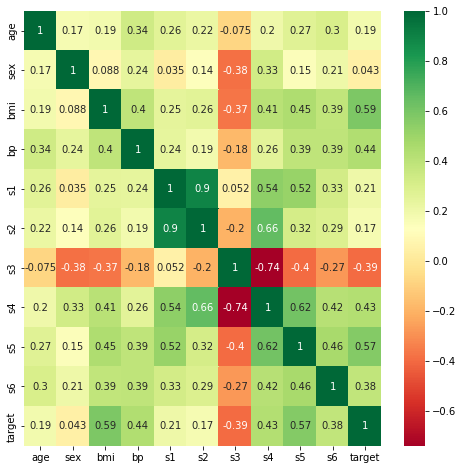

In [ ]:
#### 실습: 어떤 지수가 서로 관련이 있는지 확인해 보세요
##########################################################

import seaborn as sns
plt.subplots(figsize=(8,8))
sns.heatmap(df_data.corr(),cmap= 'RdYlGn',annot=True)
plt.show()


In [ ]:

#independent variables / explanatory variables
x = df_data.drop(labels='target', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = df_data['target']


In [ ]:
#### 실습 : Tensor 를 정보로 넘겨받기
x_train, x_test, y_train, y_test = get_train_testset(x.values,y.values, tensor=True, show=False)
x_train, x_val, y_train, y_val = ?????

#### 실습 : Tensor 의 모양 바꾸기!!
y_train = y_train.view(-1,1)
y_val = y_val.view(-1,1)
y_test = ?????

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


torch.Size([282, 10])
torch.Size([89, 10])
torch.Size([282, 1])
torch.Size([89, 1])


In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=10, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)
      

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정

Initial Cost: 168.89439392089844
Epoch    1/100000, Cost_train: 168.894104, Cost_val: 175.467377
Epoch 10001/100000, Cost_train: 76.965477, Cost_val: 75.928703
Epoch 20001/100000, Cost_train: 51.935120, Cost_val: 62.011715
Epoch 30001/100000, Cost_train: 51.409576, Cost_val: 62.065170
Epoch 40001/100000, Cost_train: 51.030209, Cost_val: 61.818008
Epoch 50001/100000, Cost_train: 50.777458, Cost_val: 61.675114
Epoch 60001/100000, Cost_train: 50.505295, Cost_val: 61.742977
Epoch 70001/100000, Cost_train: 50.039562, Cost_val: 61.588058
Epoch 80001/100000, Cost_train: 49.497162, Cost_val: 62.107708
Epoch 90001/100000, Cost_train: 48.739311, Cost_val: 62.980427
Train accuracy(RMSE) :  48.26082229614258
Test accuracy(RMSE) : 52.7850456237793


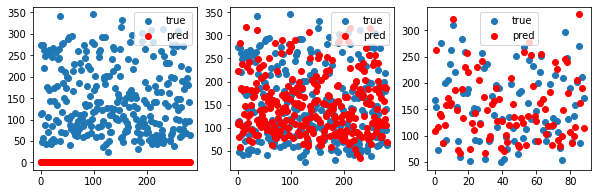

In [ ]:
#################### 
############### 실습 : MLP로 Diabetes 를 예상해 봅시다 
###################
# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = ?????
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

# LSTM 구현

* LSTM Arcitecture

<img src="https://api.wandb.ai/files/sauravmaheshkar/images/projects/445540/3b5df3df.png
" height="200px" width="300px">


* L = Sequence Length
* N = Batch Size
* Hin=input_size (=num of features)

* tensor shape (L,Hin) for unbatched input
* tensor shape (N, L, Hin) when batch_first=True
* tensor shape (L, N, Hin) when batch_forst=False

* num_layers는 LSTM의 개수를 의미함

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVJ2Yi%2FbtrE4VSN4tw%2FwO0TxP67kQqpOJiN0vP3N0%2Fimg.png
" height="150px" width="400px">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbEv7iK%2FbtrE5tnWMD7%2FBGvkQClKqRp3shsOhUJJ20%2Fimg.png
" height="150px" width="400px">




https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

https://hongl.tistory.com/247

https://ok-lab.tistory.com/209

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
df_data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_data['target'] = diabetes.target # add target
x_train, x_test, y_train, y_test = get_train_testset(x.values,y.values, tensor=True, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train,  show=False)

y_train = y_train.view(-1,1)
y_val = y_val.view(-1,1)
y_test = y_test.view(-1,1)


# 입력 길이는 1
x_train = torch.reshape(x_train,   (x_train.shape[0], 1, x_train.shape[1]))
x_val = torch.reshape(x_val,   (x_val.shape[0], 1, x_val.shape[1]))
x_test = torch.reshape(x_test,  (x_test.shape[0], 1, x_test.shape[1])) 


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([282, 1, 10])
torch.Size([89, 1, 10])
torch.Size([282, 1])
torch.Size([89, 1])


## LSTM 객체를 생성한다. 

In [ ]:
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.num_classes = num_classes 
    self.num_layers = num_layers 
    self.input_size = input_size 
    self.hidden_size = hidden_size 
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm

    self.fc =  nn.Sequential(nn.Linear(hidden_size, int(hidden_size/2)), 
                             nn.ReLU(),
                             nn.Linear(int(hidden_size/2), num_classes) 
    )

     

  def forward(self,x):

    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))  
    
    # Propagate input through LSTM
    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next

    batch_size = x.shape[0]

    out = self.fc(hn) # Final Output
    
   
    return out 

Initial Cost: 169.02223205566406
Epoch    1/100000, Cost_train: 169.021927, Cost_val: 175.597122
Epoch 10001/100000, Cost_train: 158.452164, Cost_val: 164.828522
Epoch 20001/100000, Cost_train: 79.015503, Cost_val: 77.642838
Epoch 30001/100000, Cost_train: 77.772217, Cost_val: 76.635315
Epoch 40001/100000, Cost_train: 71.650505, Cost_val: 72.057747
Epoch 50001/100000, Cost_train: 55.358906, Cost_val: 62.793854
Epoch 60001/100000, Cost_train: 52.883598, Cost_val: 60.966129
Epoch 70001/100000, Cost_train: 52.572422, Cost_val: 60.892262
Epoch 80001/100000, Cost_train: 52.486210, Cost_val: 61.043636
Epoch 90001/100000, Cost_train: 52.422123, Cost_val: 61.159321
Train accuracy(RMSE) :  52.360355377197266
Test accuracy(RMSE) : 52.90922546386719


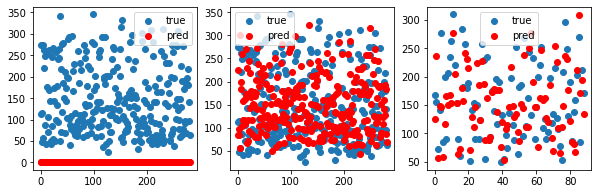

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


#####################
### 실습 : LSTM을 이용하여 실습을 수행한다. 
### num_layer를 2로 하면 어떻게 될까요?
# num_classes=1, input_size=10, hidden_size=50
model =???????
##################


preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

In [ ]:
############## 실습

class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.num_classes = num_classes 
    self.num_layers = num_layers 
    self.input_size = input_size 
    self.hidden_size = hidden_size 
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm

    self.fc =  nn.Sequential(nn.Linear(hidden_size, int(hidden_size/2)), 
                             nn.ReLU(),
                             nn.Linear(int(hidden_size/2), num_classes) 
    )

     

  def forward(self,x):

    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))  
    
    # Propagate input through LSTM
    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next

    batch_size = x.shape[0]

    ##### [실습] 어떻게 변경해서 num_layer=2 일때 동작할까요?
    #####  hn 은 num_layer *  입력개수의 크기를 가집니다. 
    ######### 맨 마지막 layer의 출력만 가지고 와야 합니다. 
    out = self.fc(????????) #Final Output
   
    return out 

Initial Cost: 168.94200134277344
Epoch    1/100000, Cost_train: 168.941696, Cost_val: 175.515701
Epoch 10001/100000, Cost_train: 157.828522, Cost_val: 164.193863
Epoch 20001/100000, Cost_train: 79.564194, Cost_val: 78.107758
Epoch 30001/100000, Cost_train: 79.498474, Cost_val: 78.051529
Epoch 40001/100000, Cost_train: 79.372429, Cost_val: 77.945816
Epoch 50001/100000, Cost_train: 79.027336, Cost_val: 77.663834
Epoch 60001/100000, Cost_train: 76.929581, Cost_val: 76.040009
Epoch 70001/100000, Cost_train: 52.793839, Cost_val: 62.327942
Epoch 80001/100000, Cost_train: 51.954296, Cost_val: 61.849983
Epoch 90001/100000, Cost_train: 51.878429, Cost_val: 61.873692
Train accuracy(RMSE) :  51.797264099121094
Test accuracy(RMSE) : 53.276676177978516


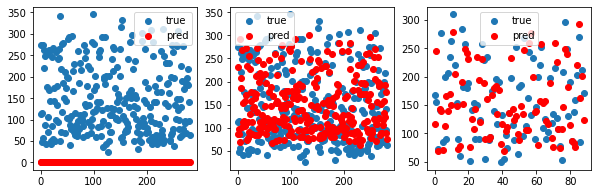

In [ ]:
############ 실습 : num_layer=2 로 변경해 봅시다

import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

###########################################
###### 실습:  학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LSTM(num_classes=1, input_size=10, hidden_size=50, num_layers=???????)
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

# [주가예측] Sequence길이가 N개인 경우는?
* Pandas DataFrame 의 Rolling을 이용하면 MovingAverage를 계산 가능합니다. 


<img src="https://datagy.io/wp-content/uploads/2020/07/How-to-Calculate-a-Rolling-Average-in-Pandas-1024x576.png
" height="350px" width="500px">


<img src="https://i0.wp.com/www.datasciencelearner.com/wp-content/uploads/2021/07/Simple-Dataframe-for-Implementing-Rolling-mean.jpg?ssl=1
" height="200px" width="400px">


<img src="https://www.datasciencelearner.com/ezoimgfmt/i0.wp.com/www.datasciencelearner.com/wp-content/uploads/2021/07/Rolling-mean-for-the-simple-dataframe.jpg?resize=450%2C183&ssl=1&ezimgfmt=ng:webp/ngcb11
" height="200px" width="400px">




[참고]

https://wikidocs.net/152788

https://www.datasciencelearner.com/pandas-rolling-mean-implementation-python-steps/

In [ ]:
!pip install finance-datareader
!pip install requests_cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import requests_cache
import matplotlib.pyplot as plt
import pandas as pd

start_date = '20100101'
end_date = '20221231'

df = fdr.DataReader('005930', start_date, end_date)   # 삼성전자: 005930


In [ ]:
################ 실습: 5일, 20일, 60일 이동평균선을 구한다
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()
df['ma60'] = df['Close'].rolling(window=60).mean()
##################################################

# 다음날 종가를 예측
df['target'] = df['Close'].shift(-1)

df = df.dropna()

In [ ]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Change    False
ma5       False
ma20      False
ma60      False
target    False
dtype: bool

In [ ]:
df

,Open,High,Low,Close,Volume,Change,ma5,ma20,ma60,target
Date,,,,,,,,,,
2010-03-30,16540,16580,16240,16280,240934,-0.004890,16360.0,15851.0,15831.333333,16360.0
2010-03-31,16280,16680,16260,16360,434300,0.004914,16356.0,15898.0,15834.333333,16900.0
2010-04-01,16520,16900,16480,16900,561659,0.033007,16460.0,15982.0,15842.000000,17140.0
2010-04-02,16920,17200,16820,17140,419069,0.014201,16608.0,16064.0,15847.333333,17400.0
2010-04-05,17220,17400,17140,17400,304516,0.015169,16816.0,16148.0,15866.333333,17380.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,58100,59100,58100,59100,10720630,0.018966,58940.0,59930.0,58913.333333,58100.0
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,57900.0
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58100.0


## 입력의 Scaling 이 다를 때 전처리

* MinMaxScaling()

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbeIaIr%2FbtqIM7PCgJ3%2F2dnDTIc3XQK5s7zwwLNYZ0%2Fimg.png" height="80px" width="150px">

* Standard Scaling()

<img src="https://velog.velcdn.com/images%2Fjiselectric%2Fpost%2F8862ef9a-13a2-4402-8c80-1929d7c37083%2F0_PXGPVYIxyI_IEHP7.png" height="80px" width="150px">


참고

아래 블로그에 잘 정리되어 있네요

https://m.blog.naver.com/wideeyed/221614354947



In [ ]:
# Normilization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

data = df[['Close', 'Open', 'High', 'Low', 'ma5', 'ma20', 'ma60']]
target = df[['target']]

In [ ]:
data.describe()

,Close,Open,High,Low,ma5,ma20,ma60
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000
mean,39504.132783,39465.693774,39841.046061,39078.967916,39478.032402,39375.382783,39091.696739
std,18881.142087,18936.161527,19092.976848,18773.332417,18874.405631,18855.088914,18792.930283
min,13600.000000,0.000000,0.000000,0.000000,14044.000000,14540.000000,15311.333333
25%,25320.000000,25335.000000,25540.000000,25100.000000,25359.000000,25407.250000,24970.000000
50%,30930.000000,30960.000000,31270.000000,30630.000000,30846.000000,30436.500000,30073.166667
75%,51400.000000,51400.000000,52000.000000,50805.000000,51370.000000,51244.500000,50631.458333
max,91000.000000,90300.000000,96800.000000,89500.000000,89960.000000,86710.000000,84005.000000


In [ ]:
# Normilization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

data = df[['Close', 'Open', 'High', 'Low', 'ma5', 'ma20', 'ma60']]
target = df[['target']]

print(f"data shape: {data.shape}")
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_target = StandardScaler()
x = scaler.fit_transform(data)
y = scaler_target.fit_transform(target)
print(scaler.n_samples_seen_, scaler.feature_range)
print(x.shape, y.shape)
print(x[0,0:10])
print(y[0:5])

data shape: (3148, 7)
3148 (0, 1)
(3148, 7) (3148, 1)
[0.03462532 0.18316722 0.17128099 0.18145251 0.0305074  0.01816544
 0.00756984]
[[-1.22679042]
 [-1.19818221]
 [-1.18546745]
 [-1.17169312]
 [-1.17275269]]


In [ ]:
############ 실습 : MinMaxScaler 를 구현해 봅시다. 
normalized_df=?????????
###################

print(normalized_df.values[0, 0:10])


############ 실습 : StandardScaler 를 구현해 봅시다. 
normalized_target=?????????
###################

print(normalized_target.values[0:5])


[0.03462532 0.18316722 0.17128099 0.18145251 0.0305074  0.01816544
 0.00756984]
[[-1.22659555]
 [-1.19799188]
 [-1.18527914]
 [-1.17150701]
 [-1.1725664 ]]


In [ ]:
##### 딥러닝에 넣을때에는 float 이여야 합니다. 
test_idx = int(len(x) * 0.8)

x_train, y_train = x[:test_idx], y[:test_idx]
x_test, y_test = x[test_idx:], y[test_idx:]

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

x_train = torch.reshape(x_train,   (x_train.shape[0], 1, x_train.shape[1]))
x_test = torch.reshape(x_test,  (x_test.shape[0], 1, x_test.shape[1])) 
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

x_train.shape, y_train.shape

(torch.Size([2518, 1, 7]), torch.Size([2518, 1]))

Initial Cost: 0.9081196188926697
Epoch    1/100000, Cost: 0.907917
Epoch 10001/100000, Cost: 0.634267
Epoch 20001/100000, Cost: 0.630872
Epoch 30001/100000, Cost: 0.625155
Epoch 40001/100000, Cost: 0.614318
Epoch 50001/100000, Cost: 0.589678
Epoch 60001/100000, Cost: 0.525445
Epoch 70001/100000, Cost: 0.318730
Epoch 80001/100000, Cost: 0.062546
Epoch 90001/100000, Cost: 0.059812
Train accuracy(RMSE) :  0.05875873938202858
Test accuracy(RMSE) : 0.2791307866573334


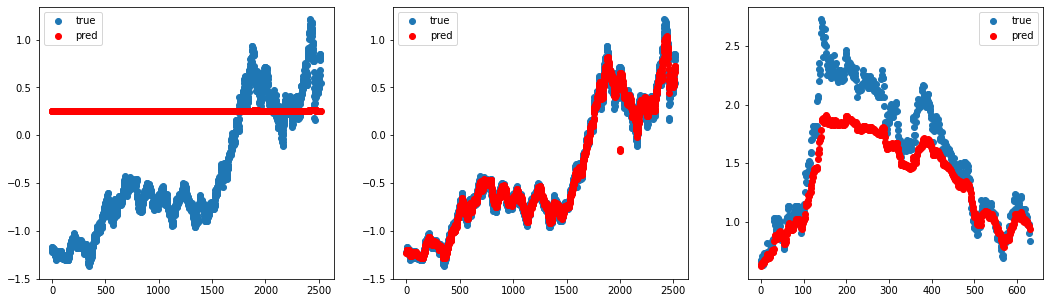

In [ ]:
import torch 
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정 
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정 
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정 
np.random.seed(seed) # numpy 관련 연산 무작위 고정


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LSTM(num_classes=1, input_size=7, hidden_size=25, num_layers=1)
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(18,5))

show_predicted(np.arange(0, x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost: {cost.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])

## 최종 결과에 대해서 Inverse Transform 하고 결과를 출력해 봅니다

In [ ]:
x_test.shape, y_test.shape

(torch.Size([630, 1, 7]), torch.Size([630, 1]))

Test accuracy(RMSE) : 0.2791307866573334


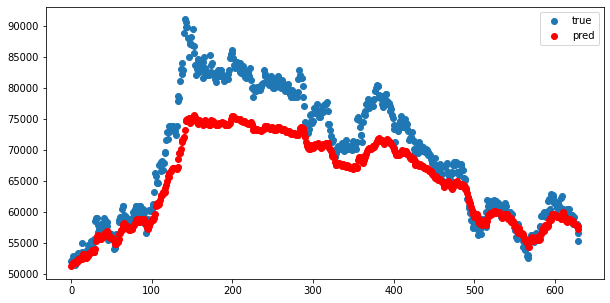

In [ ]:
preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")

#### 실습 : Sequence 길이 부분을 제거한다 
x_test_s = ?????????

##### 실습 : Inverse Transform을 수행한다. 
x_test_inv = scaler.inverse_transform(x_test_s)
y_test_inv = ?????????
preds_test_inv = ?????????

_, ax = plt.subplots(figsize=(10,5))
ax.scatter(range(x_test_inv.shape[0]),y_test_inv, label='true')
ax.scatter(range(x_test_inv.shape[0]), preds_test_inv, label='pred', color='red')
ax.legend()
